# Binary classification - movie reviews.

## Load dataset

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Helper function to get review text for example

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
def get_review_text(example):
    return ' '.join(
        # index offset of -3  to account for 'padding', 'sequence start'
        # and 'unknown' tokens.
        reverse_word_index.get(i-3, '?') for i in example
    ) 

In [4]:
get_review_text(train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## Prepare data

In [6]:
import numpy as np

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train.shape

(25000, 10000)

In [9]:
len(train_data)

25000

In [10]:
x_test.shape

(25000, 10000)

In [11]:
len(test_data)

25000

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the network

In [15]:
from keras import models
from keras import layers

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', 
                       input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
#model.compile(optimizer='rmsprop',
#             loss='binary_crossentropy',
#             metrics=['accuracy'])

In [18]:
from keras import optimizers
from keras import losses
from keras import metrics

In [19]:
#equivalent to the above, but passing arguments explicitly as objects
model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


## Create validation set

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Do the training!

In [22]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    validation_data=(x_val, y_val)
                   )

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 230us/step - loss: 0.5379 - binary_accuracy: 0.7517 - val_loss: 0.3560 - val_binary_accuracy: 0.8694
Epoch 2/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.3700 - binary_accuracy: 0.8657 - val_loss: 0.3069 - val_binary_accuracy: 0.8813
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.3349 - binary_accuracy: 0.8841 - val_loss: 0.3133 - val_binary_accuracy: 0.8772
Epoch 4/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.3029 - binary_accuracy: 0.8993 - val_loss: 0.3358 - val_binary_accuracy: 0.8796
Epoch 5/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.2909 - binary_accuracy: 0.9022 - val_loss: 0.3304 - val_binary_accuracy: 0.8822
Epoch 6/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.2817 - binary_accuracy: 0.9075 - val_loss: 0.3447 - val_bi

## Inspecting the history

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'binary_accuracy', 'val_binary_accuracy', 'loss'])

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

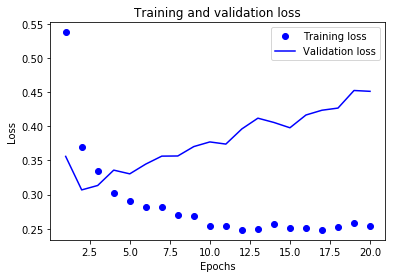

In [26]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

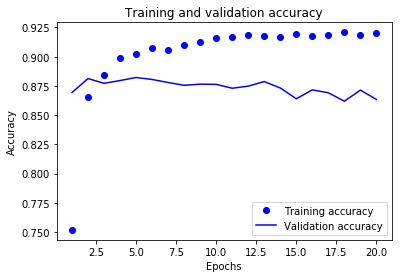

In [27]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Retrain on only two epochs to avoid overfitting

In [67]:
early_stopping_point=2

In [68]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=early_stopping_point, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/2
25000/25000 [==============================] - 2s 90us/step - loss: 0.4631 - acc: 0.8186
Epoch 2/2
25000/25000 [==============================] - 3s 133us/step


## Evaluate the final test loss

In [69]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 49us/step


In [70]:
results

[0.3005893516921997, 0.88036]

## Use the model to generate predictions

In [71]:
predictions = model.predict(x_test)

(array([7783., 2235., 1425., 1200., 1072., 1069., 1352., 1636., 2522.,
        4706.]),
 array([1.68800307e-06, 1.00000089e-01, 1.99998489e-01, 2.99996890e-01,
        3.99995291e-01, 4.99993691e-01, 5.99992092e-01, 6.99990493e-01,
        7.99988894e-01, 8.99987294e-01, 9.99985695e-01]),
 <a list of 10 Patch objects>)

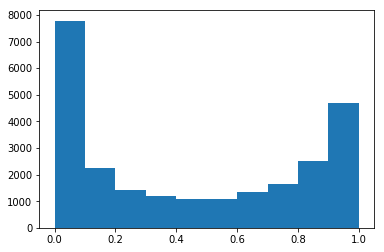

In [72]:
plt.hist(predictions)

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

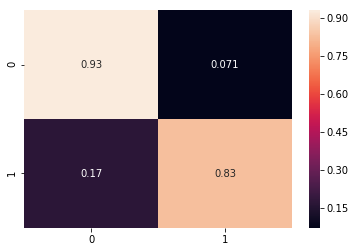

In [88]:
cm = confusion_matrix(y_test, predictions >= 0.5)
norm_cm = cm.astype('float32') / cm.sum(axis=1)
sn.heatmap(
    norm_cm,
    annot=True
)